# Trabalho de Análise de Dados do Covid em conformidade com a Ação da Prefeitura

Este trabalho tem como objetivo analisar os dados do Covid-19 com intuito de aprender mais sobre DataScience e Análise de Dados públicos dentro da matéria de Algoritmo e Lógica de Programação minitrada pelo professor Fernando Masanori, não tendo nenhum vínculo político ou com a intenção de ser utilizado por tal ramo. 

Vamos tentar entender o porquê de estarmos escutando na mídia que os casos de Covid no Interior só tem aumentado.
Será a mídia tendenciosa ? 
Tire suas conclusões!
Vamos aos Dados


In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
import folium 
import requests

ARQUIVO DE BASE DE DADOS RETIRADO DO https://covid.saude.gov.br/

In [22]:
filename = r'C:\Users\nicolas.telles\Desktop\HIST_PAINEL_COVIDBR_06jul2020.xlsx'
df = pd.read_excel(filename)
df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
555131,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-02,27,3015268,52281,1605,631,11,NaN,NaN,1.0
555132,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-03,27,3015268,53996,1715,643,12,NaN,NaN,1.0
555133,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-04,27,3015268,55760,1764,671,28,NaN,NaN,1.0
555134,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-05,28,3015268,57854,2094,699,28,NaN,NaN,1.0
555135,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-06,28,3015268,60383,2529,726,27,NaN,NaN,1.0


In [3]:
mapa = folium.Map(location = [-15.794410, -47.887930],zoom_start = 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555136 entries, 0 to 555135
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  555136 non-null  object        
 1   estado                  555003 non-null  object        
 2   municipio               549270 non-null  object        
 3   coduf                   555136 non-null  int64         
 4   codmun                  551412 non-null  float64       
 5   codRegiaoSaude          549270 non-null  float64       
 6   nomeRegiaoSaude         549270 non-null  object        
 7   data                    555136 non-null  datetime64[ns]
 8   semanaEpi               555136 non-null  int64         
 9   populacaoTCU2019        552994 non-null  object        
 10  casosAcumulado          555136 non-null  int64         
 11  casosNovos              555136 non-null  int64         
 12  obitosAcumulado         555136

Vamos ver a situação do estado de SP em que encontra SJC 

In [5]:
df.groupby('estado')['casosNovos'].max().sort_values(ascending=False)

estado
SP    19030
BA     8822
CE     8111
MG     6122
RJ     6061
RN     5265
PA     3567
PB     3333
AP     2842
MA     2805
AM     2763
DF     2529
RR     2430
PR     2404
PE     2279
GO     2238
ES     2031
SE     1707
SC     1686
PI     1637
AL     1487
RS     1282
MT     1244
RO     1098
MS      711
TO      546
AC      524
Name: casosNovos, dtype: int64

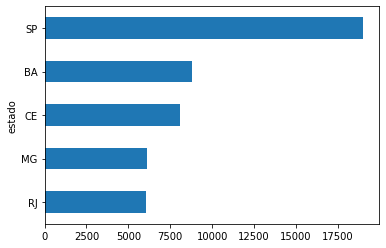

In [52]:
df.groupby('estado')['casosNovos'].max().sort_values().tail(5).plot(kind= 'barh')

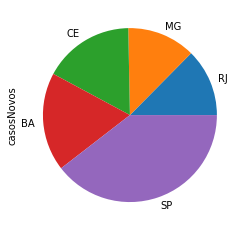

In [50]:
df.groupby('estado')['casosNovos'].max().sort_values().tail(5).plot(kind= 'pie')

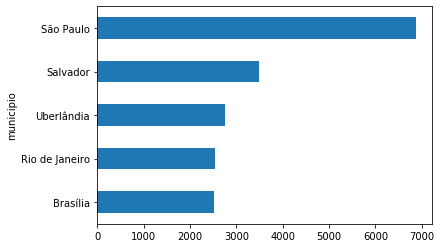

In [59]:
df.groupby('municipio')['casosNovos'].max().sort_values().tail(5).plot(kind= 'barh')

In [7]:
df['data'] = df['data'].dt.strftime('%d/%m')

# Prefeitura define regras retomada da atividade econômica:

https://www.sjc.sp.gov.br/noticias/2020/maio/28/prefeitura-define-regras-retomada-da-atividade-economica/

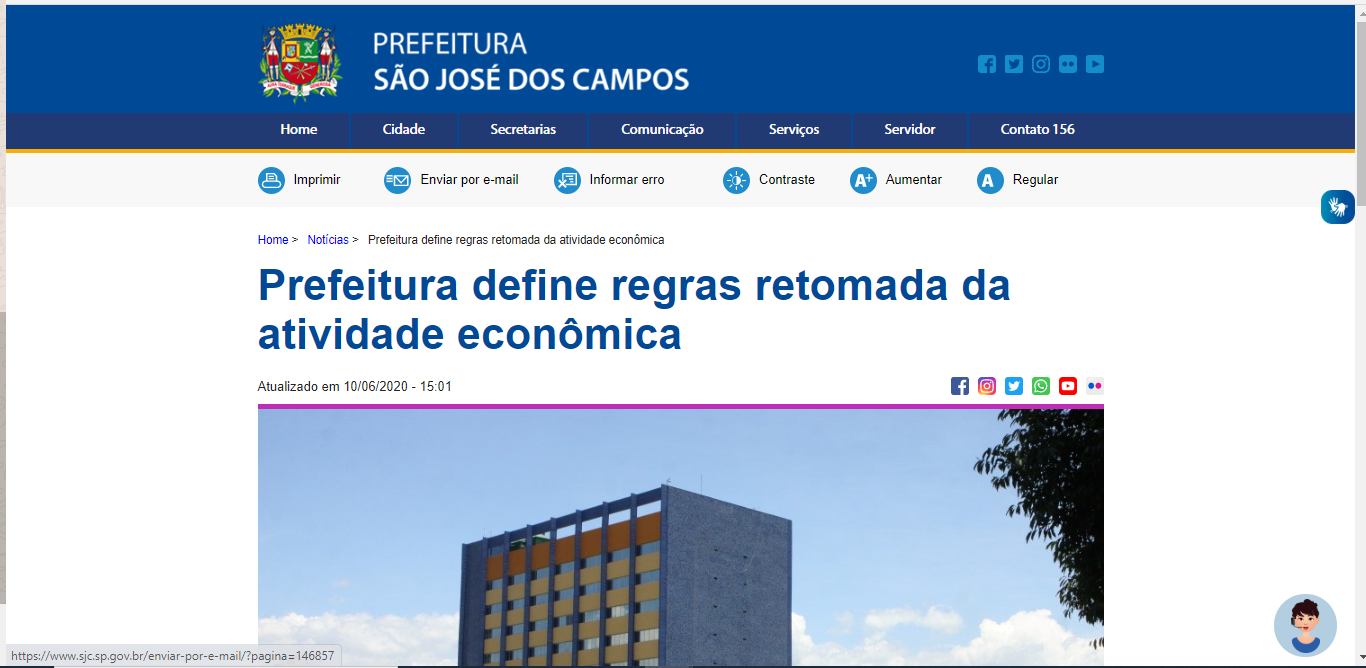

In [11]:
from IPython.display import Image
Image("prefeitura1.png")

Nesta notícia publicada dia 01/06/2020 a prefeitura decide reabrir o comércio com restrições, mas decide abrir. Vejamos os resultados:

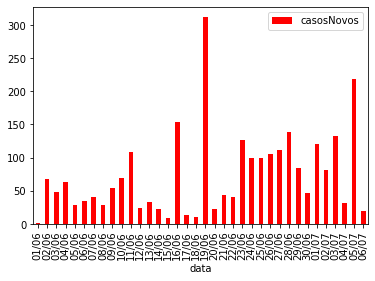

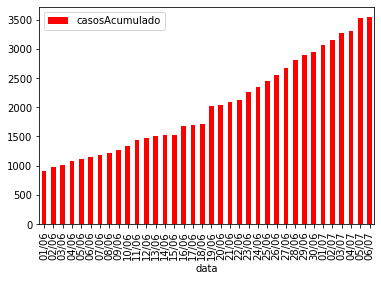

In [8]:
#Casos novos do dia da abertura ao dia 06/07/2020
sp = df.query('municipio == "São José dos Campos"')
sp.tail(36).plot(kind='bar',x='data', y='casosNovos', color = 'red')



#Casos acumulados do dia da abertura ao dia 06/07/2020
sp = df.query('municipio == "São José dos Campos"')
sp.tail(36).plot(kind='bar',x='data', y='casosAcumulado', color = 'red')

Note a crescente de casos acumulados abaixo na cidade de SJC , e o aumento grotesco de número de casos novos desde que foi feita a abertura do comércio.

# Comitê de Prevenção recomenda proibição do comércio aos sábados e domingos

https://www.sjc.sp.gov.br/noticias/2020/junho/25/comite-de-prevencao-recomenda-proibicao-do-comercio-aos-sabados-e-domingos/

Devido a abertura do comércio e grande quantidade de pessoas frequentando os comércios no fim de semana, notou-se que em entre o dia 19 e 20 de junho teve-se o pico de casos, como pode-se oberservar no priemeiro gráfico e traz conformidade a notícia a abaixo  

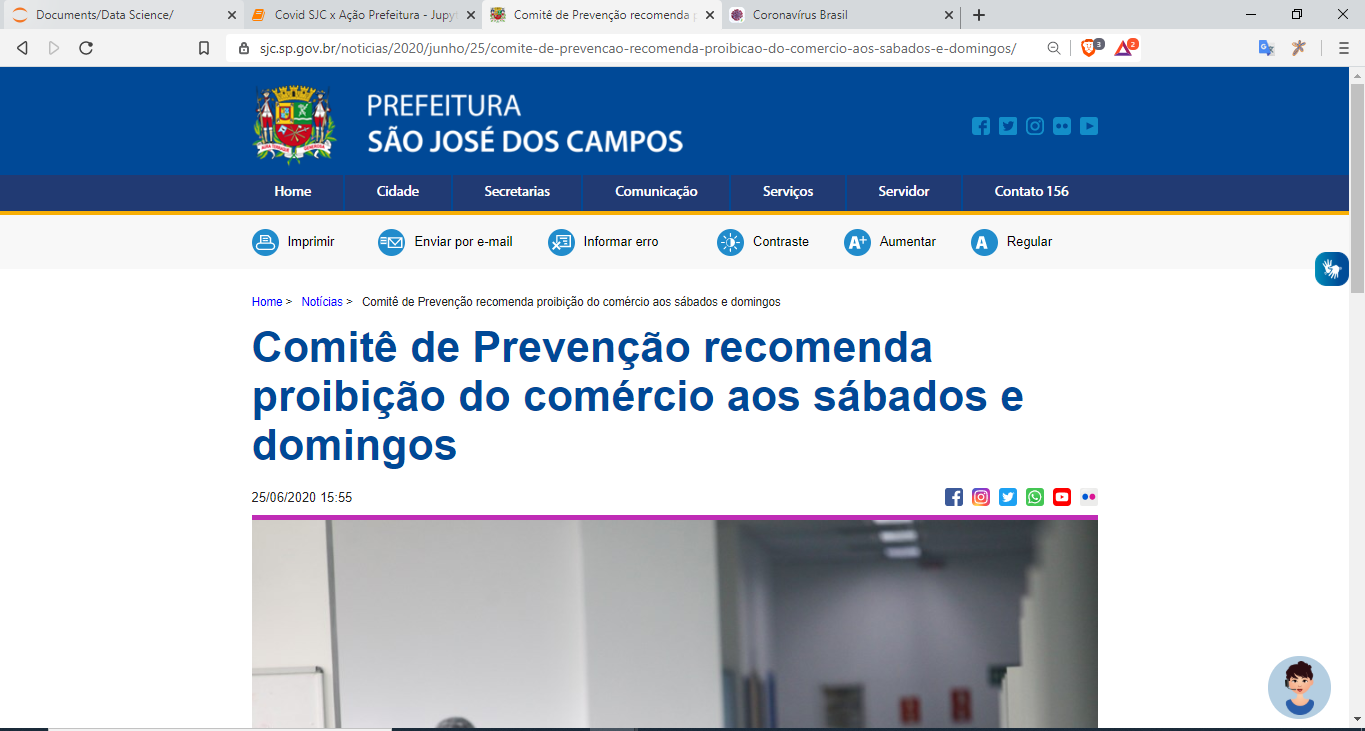

In [27]:
from IPython.display import Image
Image("prefeitura.png")

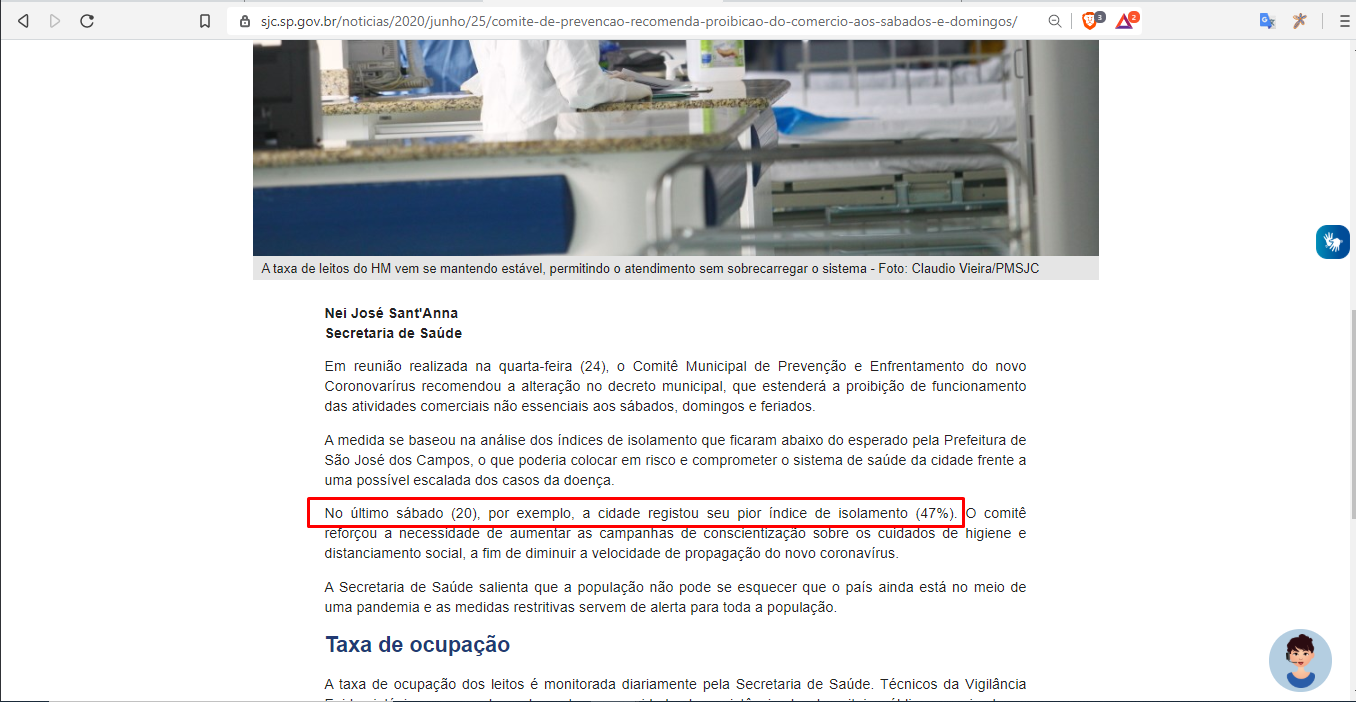

In [29]:
from IPython.display import Image
Image("prefeitura2.png")